In [1]:
import pandas as pd
import zipfile
import seaborn as sns
import utils
from utils import line_count
import os
import fs
from fs import filesize
from pathlib import Path
from utils import head
import matplotlib.pyplot as plt
import numpy as np
import altair as alt


In [2]:
data_dir = 'data'
dest_path = '/Users/idanlevi/PycharmProjects/finalProject/data'
file_name = 'vehicles.csv'
# data_dest holds the dataset file (the large file)
# data_dest = utils.fetch_and_cache(data_url=None, file=file_name, data_dir=data_dir)
tmp = os.path.getsize(file_name)
# print("The size of your file is -> ", fs.filesize.traditional(tmp))

# @line_num number of lines in dataset
line_num = line_count(file_name)
num_file = line_num / 5

In [3]:
def data_splitter(n_o_lines, num_f):
    counter = 0
    i = 1
    df = pd.read_csv('vehicles.csv', iterator=True, chunksize=int(num_f))
    save_to_path = data_dir
    for chunk in df:
        new_file = 'vehicles_{}.csv'.format(i)
        chunk.to_csv(os.path.join(save_to_path, new_file), mode='w', header=True, index=True)
        i += 1
        counter += 1
        if i > 10:
            break
    return_msg = f'successfully created {counter} files'
    print(return_msg)

In [4]:
data_splitter(line_num, num_file)

successfully created 5 files


In [182]:
vehicles = pd.read_csv("data/vehicles_1.csv", index_col=0)
del vehicles['id'], vehicles['url'], vehicles['region'], vehicles['region_url'], vehicles['title_status'], vehicles['vin'], vehicles['size'], vehicles['image_url'], vehicles['description'], vehicles['county'], vehicles['long'], vehicles['lat']
df = pd.DataFrame(vehicles)
df['state'] = df['state'].str.upper()
df['manufacturer'] = df['manufacturer'].str.title()
df.sample(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
105691,8550,2014.0,Hyundai,veloster coupe 3d,excellent,4 cylinders,gas,70500.0,automatic,fwd,coupe,yellow,KS
104013,13600,2014.0,Toyota,camry,excellent,4 cylinders,gas,49009.0,automatic,fwd,sedan,white,AK
12693,0,2015.0,Ram,1500,excellent,8 cylinders,gas,NaN,automatic,rwd,pickup,NaN,WA
52078,7990,2009.0,Ford,f-150 xlt 4x4,excellent,8 cylinders,gas,177588.0,automatic,4wd,pickup,grey,WI
5272,13000,2013.0,Dodge,journey,NaN,NaN,gas,75659.0,automatic,NaN,hatchback,NaN,WA
54101,16600,2015.0,Hyundai,sonata limited sedan 4d,good,NaN,gas,39680.0,automatic,fwd,sedan,NaN,CA
52726,795,2010.0,Ford,f-150,excellent,8 cylinders,gas,136157.0,automatic,4wd,truck,silver,PA
40424,21500,1997.0,Gmc,sierra,NaN,NaN,gas,55000.0,automatic,NaN,NaN,NaN,NY
63448,3000,2006.0,Honda,cr-v,good,4 cylinders,gas,160800.0,automatic,fwd,SUV,silver,TX
113183,6500,2003.0,Ford,f250 super duty,excellent,10 cylinders,gas,110650.0,automatic,4wd,pickup,silver,CA


In [183]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113341 entries, 0 to 113340
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         113341 non-null  int64  
 1   year          113127 non-null  float64
 2   manufacturer  108349 non-null  object 
 3   model         111735 non-null  object 
 4   condition     63930 non-null   object 
 5   cylinders     68844 non-null   object 
 6   fuel          112591 non-null  object 
 7   odometer      92688 non-null   float64
 8   transmission  112497 non-null  object 
 9   drive         81049 non-null   object 
 10  type          83113 non-null   object 
 11  paint_color   77291 non-null   object 
 12  state         113341 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 12.1+ MB


## Check for null rows

In [184]:
def null_checker(df):
    null_values = df.isnull().sum()
    null_values=pd.DataFrame(null_values, columns=['null'])
    j=1
    sum_tot=len(df)
    null_values['percent']=round((null_values['null']/sum_tot) * 100, 2) 
    return null_values.sort_values('percent',ascending=False)
null_checker(df)

,null,percent
condition,49411,43.59
cylinders,44497,39.26
paint_color,36050,31.81
drive,32292,28.49
type,30228,26.67
odometer,20653,18.22
manufacturer,4992,4.40
model,1606,1.42
transmission,844,0.74
fuel,750,0.66


In [185]:
# Check how many rows do not have price.
print('Total number of rows without price: ', df[df.price == 0].shape[0])

Total number of rows without price:  8939


locate prices in range between 800 - 15,0000, low and high prices tend to be unrealistic.

In [186]:
df=df[(df.price < 150000) & (df.price > 800)]

In [187]:
df=df[(df.odometer < 300000) & (df.odometer > 1000)]

In [188]:
df=df[df.year >= 1990]

In [189]:
print('Min year in the data: ', min(df.year))

Min year in the data:  1990.0


In [190]:
df.shape

(80890, 13)

In [191]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,10299,2012.0,Acura,tl,NaN,NaN,gas,90186.0,automatic,NaN,other,blue,NC
2,9500,2011.0,Jaguar,xf,excellent,NaN,gas,85000.0,automatic,NaN,NaN,blue,NC
3,3995,2004.0,Honda,element,NaN,NaN,gas,212526.0,automatic,fwd,SUV,orange,NC
5,12995,2015.0,Kia,sportage,NaN,NaN,gas,85127.0,automatic,4wd,wagon,NaN,NC
6,10995,2014.0,Chevrolet,traverse,NaN,NaN,gas,112383.0,automatic,fwd,SUV,black,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113336,2500,2006.0,Ford,crown victoria p71,good,8 cylinders,gas,92500.0,automatic,rwd,sedan,white,FL
113337,11975,2016.0,Mazda,mazda3,excellent,NaN,gas,31770.0,automatic,fwd,sedan,blue,RI
113338,9500,1999.0,Ram,2500,NaN,NaN,diesel,216000.0,automatic,NaN,NaN,NaN,RI
113339,23900,2017.0,Chevrolet,camaro lt coupe 2d,good,6 cylinders,gas,16376.0,other,rwd,coupe,white,SC


In [192]:
list_columns_names = list(df.columns.values)
print(list_columns_names)


['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state']


Condition attribute:
some of the rows are null values, in order to save those rows and make it more readable I have change the value of null for 'new' where the year is more than 2019 and 'like new' for used cars with year greater than 2017.

In [193]:
#Check the distributation of 'condition'
df.condition.value_counts()

excellent    22420
good         21926
like new      4357
fair          1025
new            129
salvage         64
Name: condition, dtype: int64

In [194]:
# Convert null values for cars between 2017 - 2019
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.loc[df.year>=2017, 'condition'] = df.loc[df.year>=2017, 'condition'].fillna('like new')

In [195]:
#Results after changing null values.
df.condition.value_counts()

excellent    22420
good         21926
like new      9628
new           1735
fair          1025
salvage         64
Name: condition, dtype: int64

In [196]:
null_checker(df)

,null,percent
cylinders,27142,33.55
condition,24092,29.78
paint_color,19125,23.64
drive,16131,19.94
type,13494,16.68
manufacturer,2102,2.60
transmission,648,0.80
model,643,0.79
fuel,602,0.74
price,0,0.00


In [197]:
# Average milage per condition/ year
average_mileage_ex = df[df.condition == 'excellent']['odometer'].mean().astype(int)
average_mileage_go = df[df.condition == 'good']['odometer'].mean().astype(int)
average_mileage_ln = df[df.condition == 'like new']['odometer'].mean().astype(int)
average_mileage_fa = df[df.condition == 'fair']['odometer'].mean().astype(int)
avarage_mileage_sa = df[df.condition == 'salvage']['odometer'].mean().astype(int)

result = [average_mileage_ex, average_mileage_go, average_mileage_ln, average_mileage_fa, avarage_mileage_sa]
result

[108348, 93480, 59917, 173653, 138673]

In [198]:
#Assign the average result that were given in the above find in order to cpmlete all null 'condtion'
df.loc[df['odometer'] < average_mileage_ln, 'condition'] = df.loc[df['odometer'] < average_mileage_ln, 'condition'].fillna('like new')
df.loc[df['odometer'] >= average_mileage_fa, 'condition'] = df.loc[df['odometer'] >= average_mileage_fa, 'condition'].fillna('fair')
df.loc[(df['odometer'] > average_mileage_ln) & (df['odometer'] <= average_mileage_ex), 'condition'] = df.loc[(df['odometer'] > average_mileage_ln) & (df['odometer'] <= average_mileage_ex), 'condition'].fillna('excellent')
df.loc[(df['odometer'] > average_mileage_ex) & (df['odometer'] <= average_mileage_go), 'condition'] = df.loc[(df['odometer'] > average_mileage_ex) & (df['odometer'] <= average_mileage_go), 'condition'].fillna('good')
df.loc[(df['odometer'] > average_mileage_go) & (df['odometer'] <= average_mileage_fa), 'condition'] = df.loc[(df['odometer'] > average_mileage_go) & (df['odometer'] <= average_mileage_fa), 'condition'].fillna('salvage')
print("Number of null rows and cells: ", df.condition.isnull().sum())

Number of null rows and cells:  0


In [199]:
null_checker(df)

,null,percent
cylinders,27142,33.55
paint_color,19125,23.64
drive,16131,19.94
type,13494,16.68
manufacturer,2102,2.60
transmission,648,0.80
model,643,0.79
fuel,602,0.74
price,0,0.00
year,0,0.00


The above table shows the number of null rows, there are still some null rows where there is no option to change them such as: Cylinders, fuel and Paint_color. Those values will change to 'fillna' method.

In [203]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
state            object
dtype: object

In [204]:
df.fillna(inplace=True, method='ffill')

In [205]:
df.isnull().sum()

price            0
year             0
manufacturer     0
model            0
condition        0
cylinders       11
fuel             0
odometer         0
transmission     0
drive            2
type             0
paint_color      0
state            0
dtype: int64

In [206]:
df.dropna(subset=['cylinders', 'drive'], inplace=True)

In [207]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [209]:
#Remove the word 'Cylinders' in cylinders feature in ordeer to keep it as numric value.
df['cylinders'] = df['cylinders'].apply(lambda x: x[0:1])

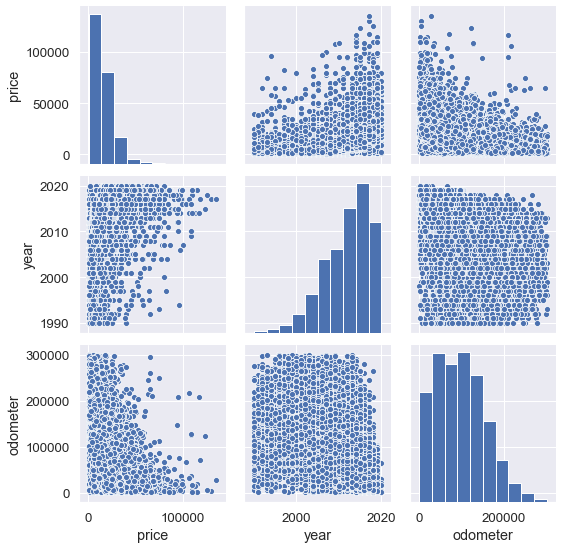

In [210]:
sns.pairplot(df)

In [211]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80879 entries, 13 to 113340
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         80879 non-null  int64  
 1   year          80879 non-null  float64
 2   manufacturer  80879 non-null  object 
 3   model         80879 non-null  object 
 4   condition     80879 non-null  object 
 5   cylinders     80879 non-null  object 
 6   fuel          80879 non-null  object 
 7   odometer      80879 non-null  float64
 8   transmission  80879 non-null  object 
 9   drive         80879 non-null  object 
 10  type          80879 non-null  object 
 11  paint_color   80879 non-null  object 
 12  state         80879 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 11.1+ MB


,price,year,odometer
count,80879.000000,80879.000000,80879.000000
mean,15216.044647,2011.362925,98057.114912
std,10843.196463,5.431817,58341.859983
min,815.000000,1990.000000,1001.000000
25%,6900.000000,2008.000000,48654.000000
50%,12998.000000,2012.000000,93880.000000
75%,20900.000000,2016.000000,137500.000000
max,134895.000000,2020.000000,299999.000000


In [212]:
df.nunique()

price            7412
year               31
manufacturer       40
model           10535
condition           6
cylinders           7
fuel                5
odometer        42269
transmission        3
drive               3
type               13
paint_color        12
state              45
dtype: int64

## In this section some of the features will be reviewd in order to understand if they contain some real data.

### Column: Cylinder

In [213]:
trans = np.asanyarray(df.cylinders.unique())
trans

array(['8', '6', '4', '5', '3', '1', 'o'], dtype=object)

Cylinder contains 7 unique values ['8', '6', '4', '5', '3', '1', 'o']. In order to understand if these value are corrispond to their type of car/ engine we need to look at how engine are built. gaining this knoledge will help us to understand better what is the cylinder range in each type of cars.

According to J.D Power website modern engines are built with 4, 6, 8 cylinders. (https://www.jdpower.com/cars/shopping-guides/differences-between-i-4-i-6-v-6-v-8-engines)

Let's observe the cases where 1, 3 and 5 occur and see the connection between type of car.

In [214]:
one_cyl = df.loc[df['cylinders'] == '1']['year']
three_cyl = df.loc[df['cylinders'] == '3']['year']
five_cyl = df.loc[df['cylinders'] == '5']['year']

res_cyl = np.asanyarray(sorted(one_cyl.unique()))
res_cyl

array([1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.])

From the result above we can see that cars with '1' cylinder are exist and their year range is between 1995 - 2020 where the newest cannot match to the rule of new modern engine.

conclusion: cylinder feature cannot be used in this data analysis since it contains some information that do not corrispond to other features.

### Column: Fuel

In [215]:
fuel_col = np.asanyarray(df.fuel.unique())
fuel_col

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

In [216]:
electric_fuel = df.loc[df['fuel'] == 'electric']['year']

In [217]:
sorted(electric_fuel.unique())

[2000.0,
 2008.0,
 2009.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0]

In [218]:
hybrid_fuel = df.loc[df['fuel'] == 'hybrid']['year']

In [219]:
sorted(hybrid_fuel.unique())[:5]

[2001.0, 2002.0, 2003.0, 2004.0, 2005.0]

Toyota is the firs car manufacturer that made the 'Prius' model with the new hybrid engine that produced in 1999.
And we can see that there is no older car rather than 2001 in this case we can rely on this feature.

credit: https://www.carsdirect.com/green-cars/a-brief-history-of-hybrid-cars

In [42]:
# Save cleaned file as csv
def create_cleaned_file(df_to_be_created):
    df_to_be_created.to_csv('cleaned_cars_data.csv', index=False)

create_cleaned_file(df)

## Total sales per state

in this count I will try to observe any pattern of cars being sale per state. In order to get some a wide picture on other characters that impact sales, price and demand over the nation.

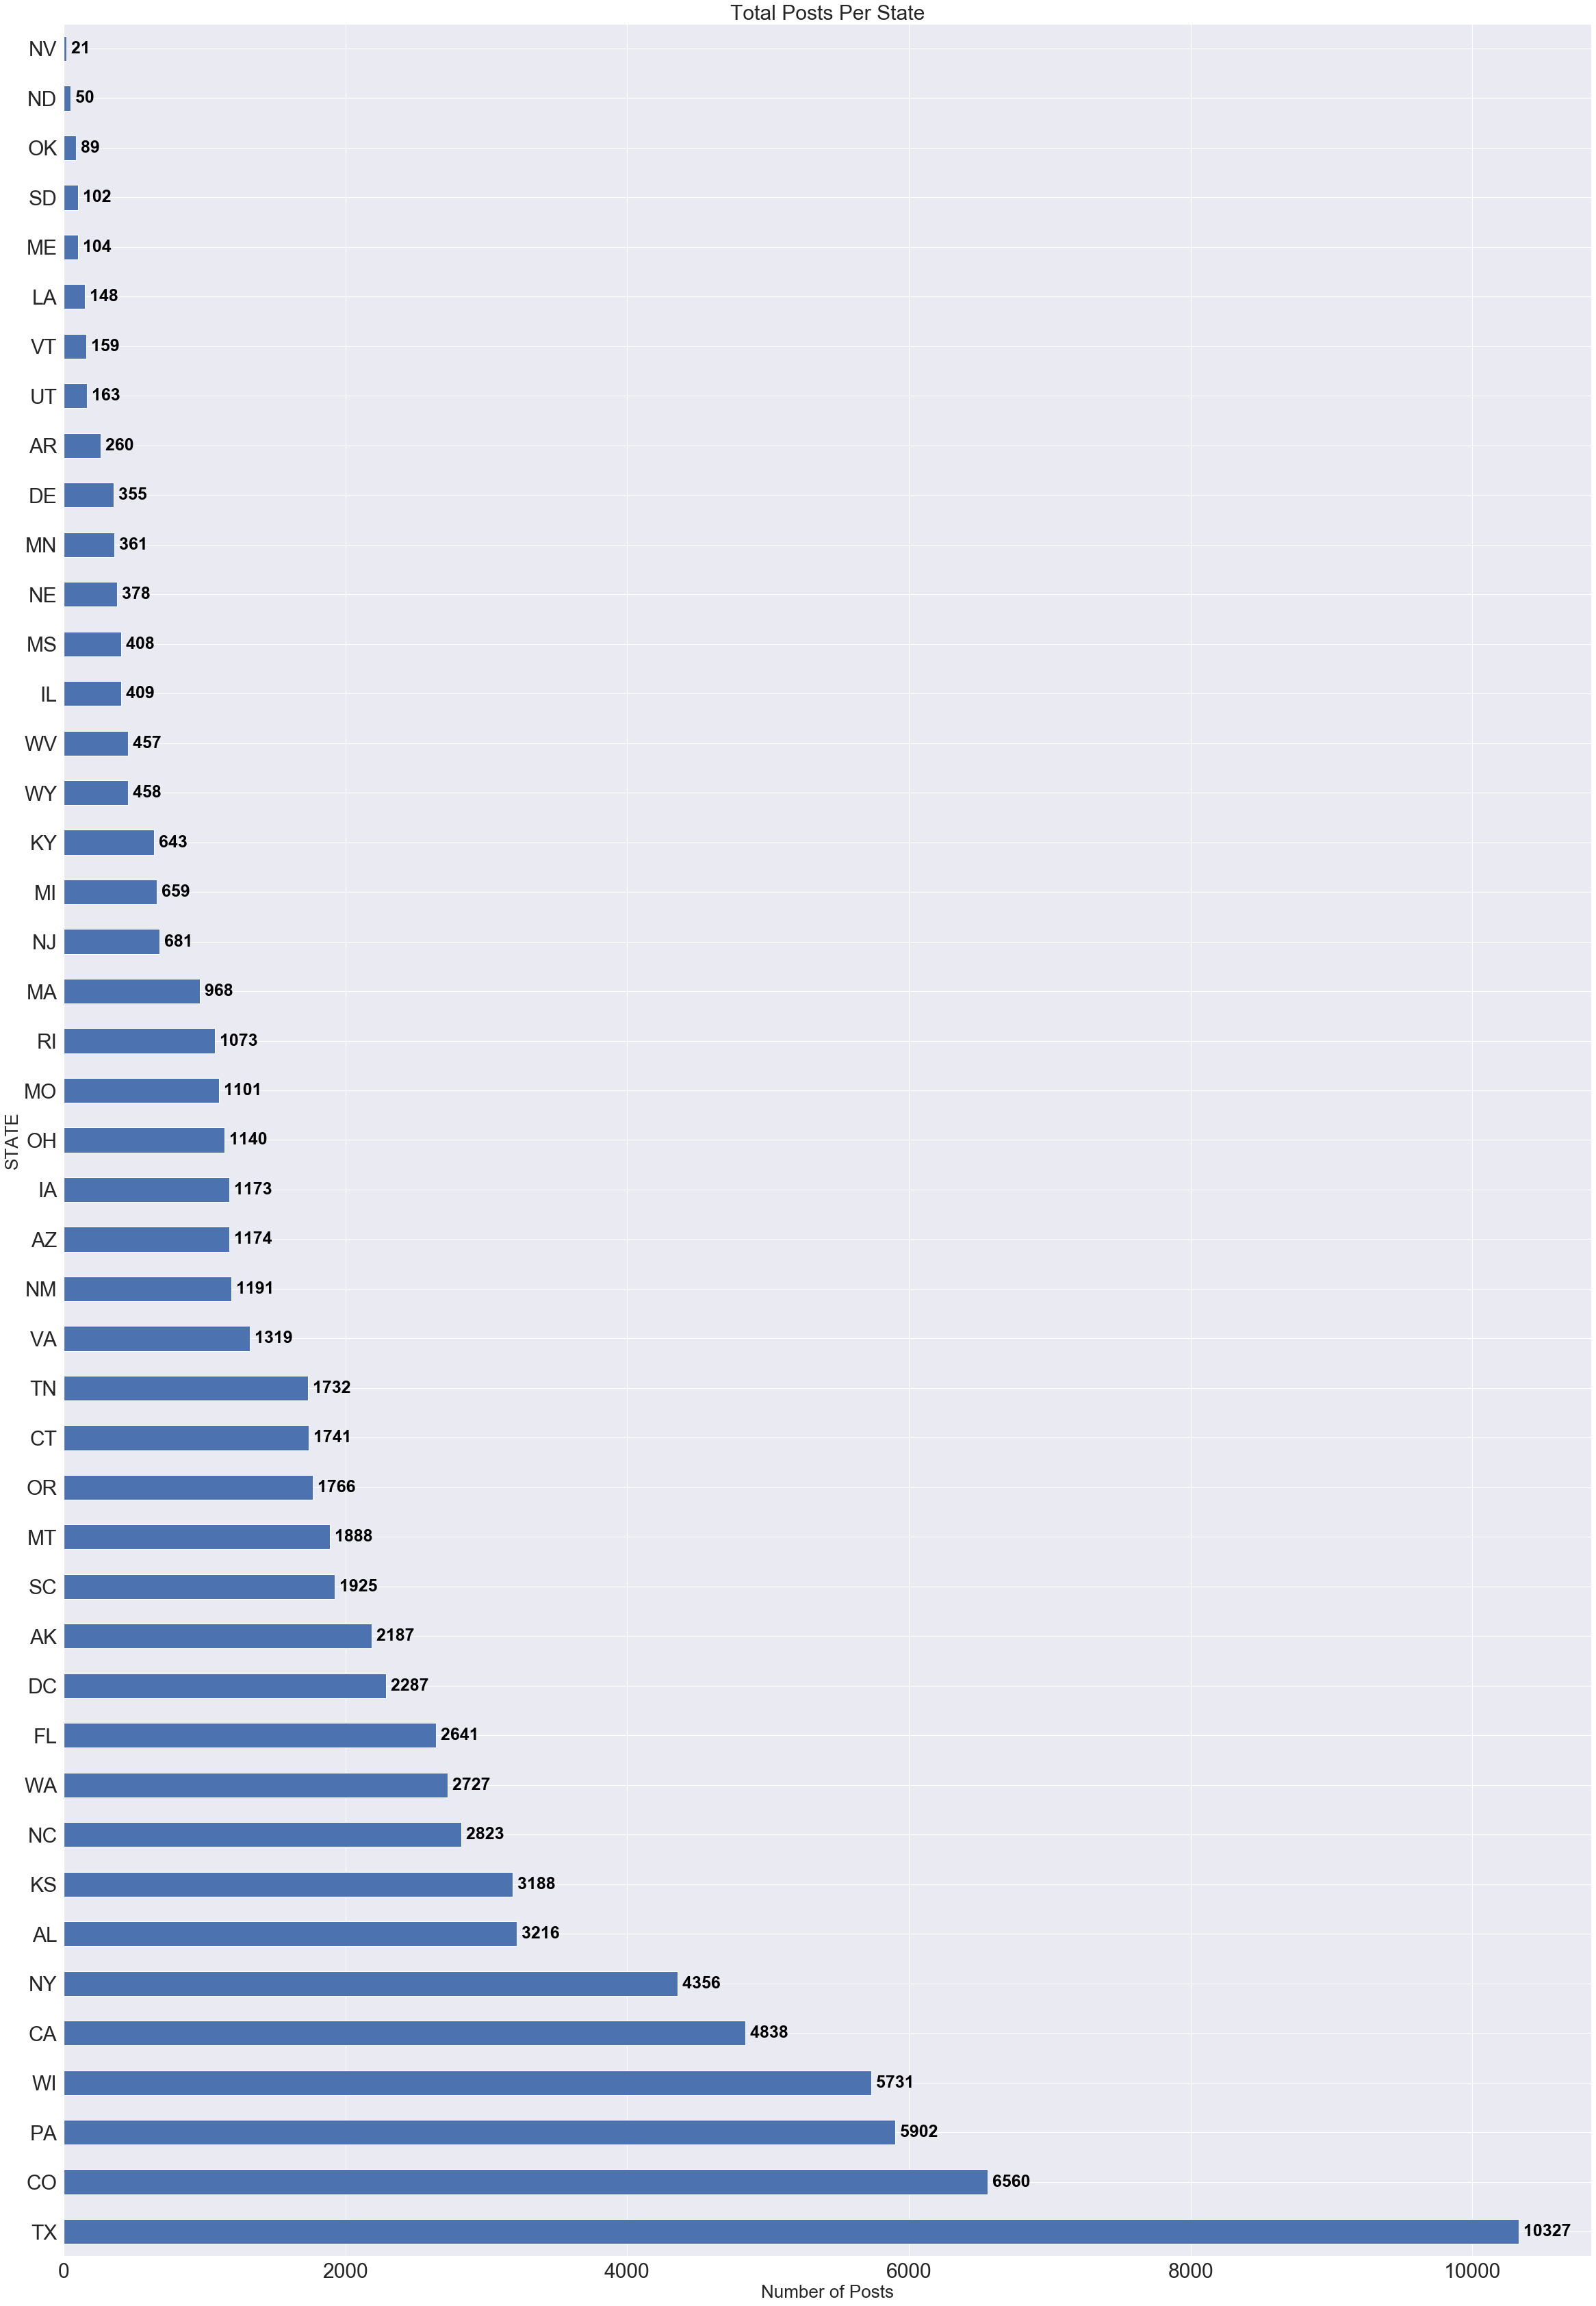

In [220]:
sns.set_style('darkgrid')
df1 = df.groupby(['state'])['state'].count()
df1 = df1.sort_values(ascending=False)
a = df1.plot.barh(figsize=(40, 60), fontsize=30)
a.set_xlabel('Number of Posts', fontsize=26)
a.set_ylabel('STATE', fontsize=26 )
a.set_title('Total Posts Per State', fontsize=30)

for i, v in enumerate(df1.values):
    a.text(v , i , " "+str(v), color='black', fontweight='bold', fontsize=25, va='center')



### Result: The state of TX has the most posts, sales per state next I will check if there is any impact on the price.

# Startegy:
in order to understand how price for used car is determent we need to take some factor into count and check how each of them impacts the price. for instance prices for used cars can be determent by the year model, engine, Odometer and so on. 


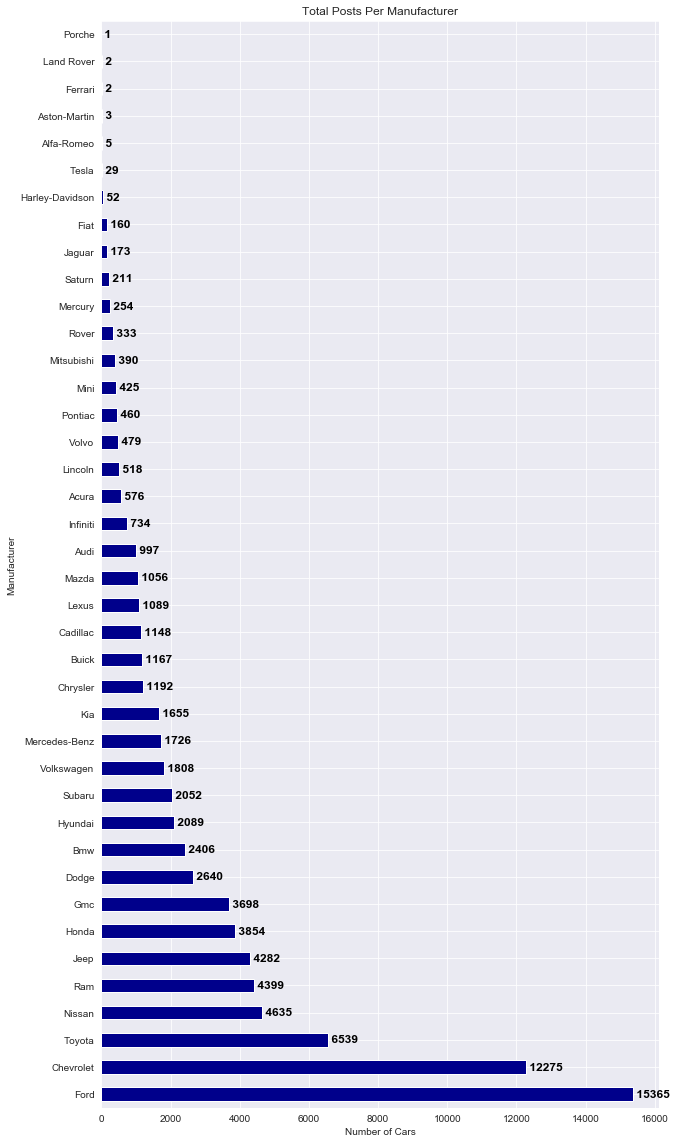

In [44]:
car_model = df.groupby(['manufacturer'])['manufacturer'].count()
car_model = car_model.sort_values(ascending=False)
car_model_plot = car_model.plot.barh(figsize=(10, 20), color='darkblue')
car_model_plot.set_xlabel('Number of Cars', fontsize=10)
car_model_plot.set_ylabel('Manufacturer', fontsize=10 )
car_model_plot.set_title('Total Posts Per Manufacturer', fontsize=12)

for i, v in enumerate(car_model.values):
    car_model_plot.text(v , i , " "+str(v), color='black', fontweight='bold', fontsize=12, va='center')


In [45]:
from wordcloud import WordCloud

In [46]:
cars_manu = pd.DataFrame(df.groupby(['manufacturer'])['manufacturer'].agg('count'))
j = range(1, len(cars_manu)+1)
sd = list(j)
cars_manu.insert(0, "index", sd)
cars_manu['Maker'] = cars_manu.index
cars_manu.reset_index(drop=True)
cars_manu.set_index('index', inplace=True)
cars_manu.rename(columns={'manufacturer': 'counter'}, inplace=True)

In [47]:
def plot_word_cloud(data_):
    data_for_cloud = dict(zip(data_['Maker'].tolist(), data_['counter'].tolist()))
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(data_for_cloud)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


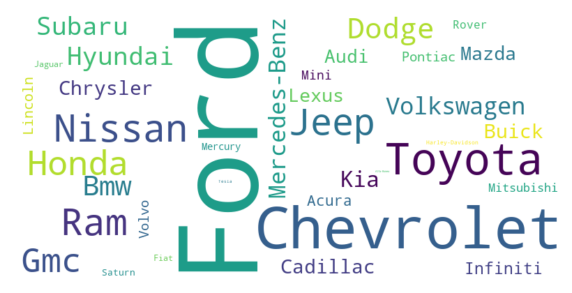

In [48]:
plot_word_cloud(cars_manu)

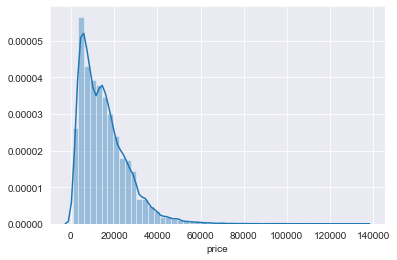

In [49]:
sns.distplot(df.price)

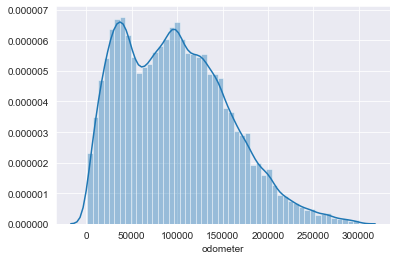

In [50]:
sns.distplot(df.odometer)

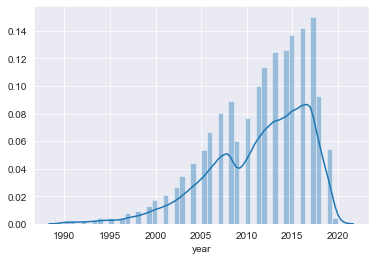

In [51]:
sns.distplot(df.year)

In [52]:
condition_order = ['new', 'like new', 'excellent', 'good', 'fair']

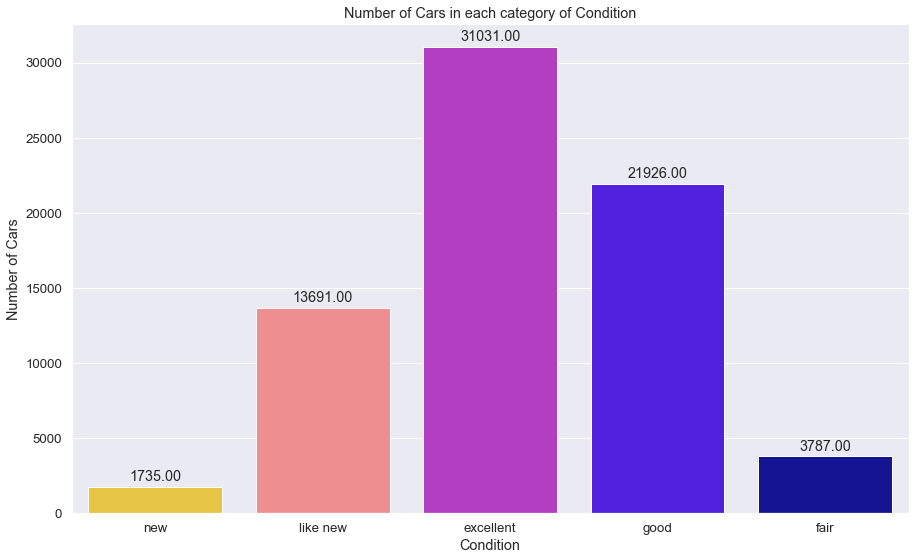

In [53]:
plt.figure(figsize=(15,9))


sns.set(font_scale=1.2)
condition_plot = sns.countplot(data=df, x='condition', order=condition_order, palette='gnuplot2_r')
condition_plot.set(xlabel='Condition', ylabel='Number of Cars', title='Number of Cars in each category of Condition')

for p in condition_plot.patches:
    condition_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

From this plot we can see that 'Ford' is the most poular manufacturer among users on Craiglist and perhaps maybe the car that people most like?

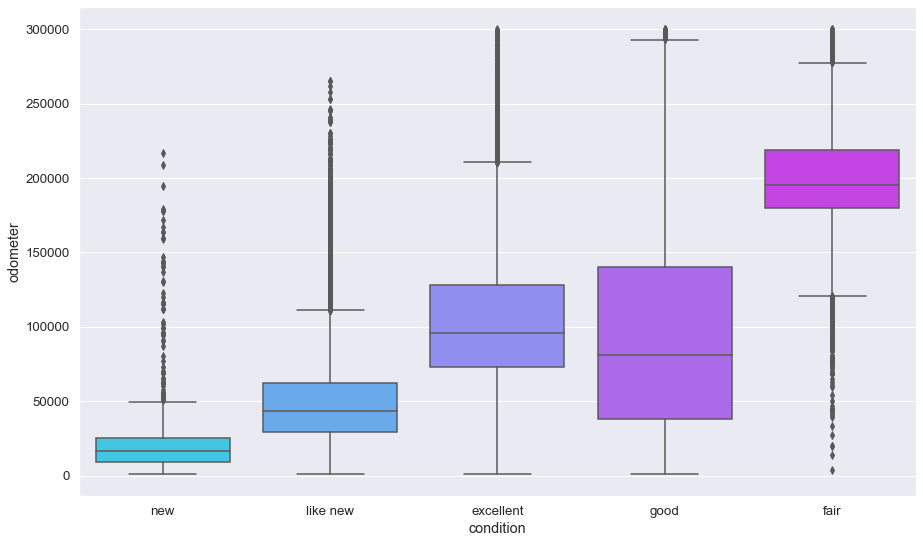

In [54]:
plt.figure(figsize=(15,9))
sns.boxplot(x='condition', y='odometer', data=df, order=condition_order, palette='cool')

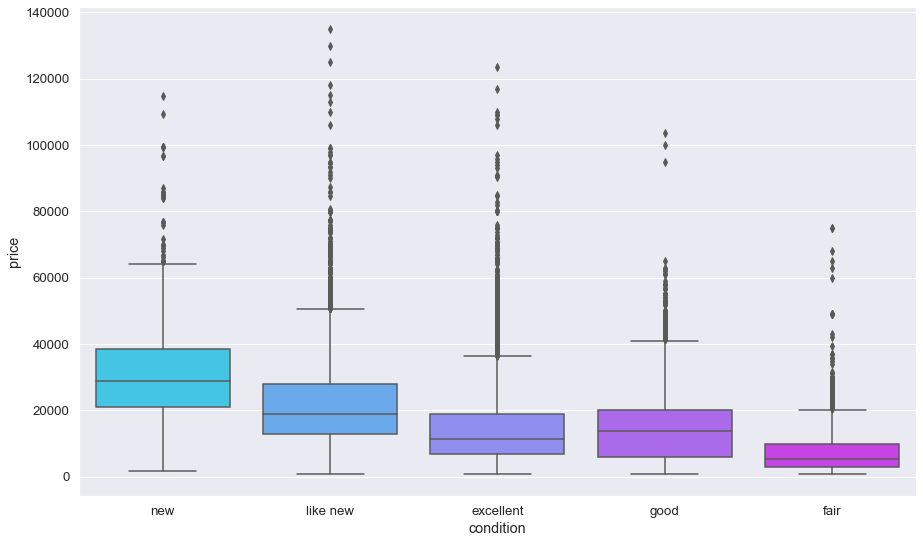

In [221]:
plt.figure(figsize=(15,9))
sns.boxplot(x='condition', y='price', data=df, order=condition_order, palette='cool')

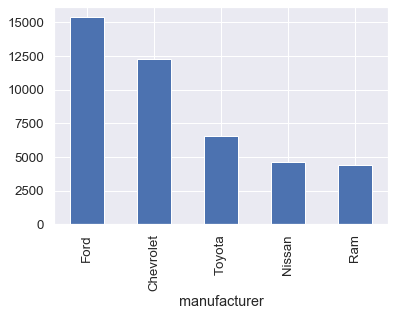

In [58]:
# Bar plot to observe the most popular manufacturer.
top_five_popular = df.groupby(['manufacturer'])['manufacturer'].count()
top_five_popular = top_five_popular.sort_values(ascending=False)[:5]
top_five_popular.plot.bar()

# Price predictions using models: LinearRegression, XGBoost

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing

### Linear regression is based on continues feature which is 'price' and depends on non-continues features such as 'condition', 'odometer', 'year' and 'fueal'

In this model I will be testing - Simple Linear Regression (), and Multiple Linear Regression In order to observe how many features can contribute to the price prediction.

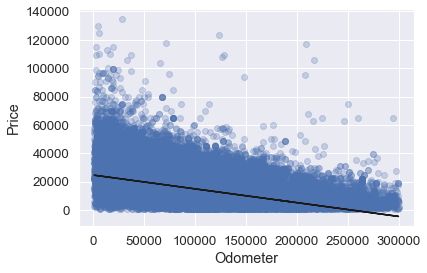

In [222]:
plt.scatter(df.odometer, df.price,alpha=0.25)
plt.xlabel('Odometer')
plt.ylabel('Price')
m, b = np.polyfit(df.odometer, df.price, 1)
plt.plot(df.odometer, m*df.odometer + b, color='k')

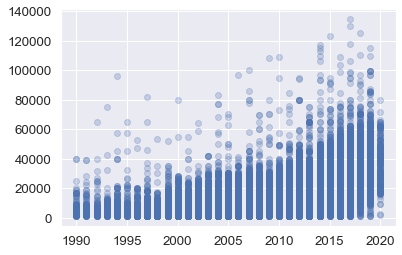

In [223]:
plt.scatter(df.year, df.price, alpha=0.25)

In [60]:
new_df = df.copy()
X = new_df['price']
Y = new_df.drop(['price'], axis=1)

In [61]:
label_columns = preprocessing.LabelEncoder()

In [224]:
new_df.sample(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
47176,10421,2012.0,Toyota,prius,excellent,6,other,105563.0,automatic,fwd,sedan,silver,WA
97596,15995,2017.0,Dodge,journey,like new,4,gas,53725.0,automatic,fwd,SUV,blue,AK
44896,8000,2007.0,Honda,cr-v,excellent,4,gas,129442.0,automatic,4wd,SUV,silver,MT
77382,13700,2014.0,Toyota,prius one hatchback 4d,good,6,gas,76198.0,automatic,fwd,hatchback,silver,CA
60351,4999,2014.0,Dodge,journey sxt,fair,6,gas,72156.0,automatic,fwd,SUV,red,TX
109783,1500,2000.0,Gmc,yukon xl denali,fair,8,electric,224000.0,automatic,4wd,SUV,black,AZ
8402,21900,2012.0,Jeep,wrangler,salvage,6,gas,129479.0,automatic,4wd,SUV,red,TN
56889,8900,2010.0,Gmc,sierra 1500,salvage,8,gas,134000.0,automatic,4wd,sedan,blue,CT
104397,25900,2012.0,Ford,super duty f-250 srw,salvage,8,gas,113250.0,automatic,4wd,pickup,red,KS
54540,8500,2011.0,Chevrolet,equinox lt,excellent,4,gas,104000.0,automatic,4wd,SUV,blue,MT


In [63]:
Y[['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type']] = new_df[['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type']].apply(label_columns.fit_transform)

In [64]:
Y.drop(['model', 'cylinders', 'paint_color', 'state'], axis=1, inplace=True)

In [65]:
Y.info()
feature_names = [x.title() for x in Y.columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80879 entries, 13 to 113340
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          80879 non-null  float64
 1   manufacturer  80879 non-null  int64  
 2   condition     80879 non-null  int64  
 3   fuel          80879 non-null  int64  
 4   odometer      80879 non-null  float64
 5   transmission  80879 non-null  int64  
 6   drive         80879 non-null  int64  
 7   type          80879 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 5.6 MB


## Multiple Regression Model

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Y, X, test_size=0.2, random_state=100)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


64703
64703
16176
16176


In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [69]:
linreg = linear_model.LinearRegression()

In [70]:
fit_fit = linreg.fit(X_train, y_train)

In [71]:
print('Coefficients: ' ,linreg.coef_)

Coefficients:  [ 21405.85387682  -2103.51521792   1724.77548334 -17984.44252707
 -18237.79492253    437.35820888  -4809.10746112    520.06334363]


## Prediction

In [72]:
X_pred = linreg.predict(X_test)
print(X_pred)


[24113.77850191 16011.45447041 22955.17036064 ...  4025.86490229
 12849.63246254 13482.33759096]


In [73]:
print("Residual sum of squares: %.2f" % np.mean((X_pred - y_test) ** 2))

print('Variance score: %.2f' % linreg.score(X_test, y_test))

Residual sum of squares: 62546650.40
Variance score: 0.47


From this result we can lear that this method does not giving the best prediction, therefore we will try another model. The best possible score is 1.0, lower values are worse.

# Model evaluation metrics for regression
### check errors by using: MAE, MSE, RMSE

In [74]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

mae_errors = metrics.mean_absolute_error(y_test, X_pred)
print('MAE: ', mae_errors)
mse_errors = metrics.mean_squared_error(y_test, X_pred)
print('MSE: ', mse_errors)
rmse_errors = np.sqrt(mse(y_test, X_pred))
print('RMSE: ', rmse_errors)
accuracy = linreg.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')

MAE:  5684.097369450329
MSE:  62546650.396966964
RMSE:  7908.6440302347
Accuracy =  46.527473463751576 %


### Feature Imortance - Using Random Forest method

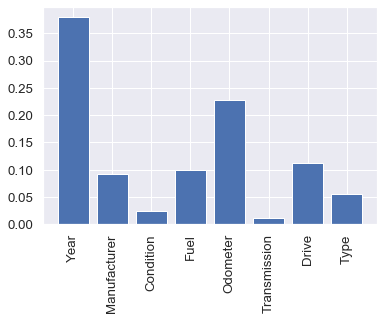

Feature: Year, Score: 0.379
Feature: Manufacturer, Score: 0.092
Feature: Condition, Score: 0.024
Feature: Fuel, Score: 0.099
Feature: Odometer, Score: 0.228
Feature: Transmission, Score: 0.011
Feature: Drive, Score: 0.111
Feature: Type, Score: 0.055


In [75]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


model = RandomForestRegressor(n_estimators=8)
# fit the model
model.fit(X_train, y_train)
# get importance
importances_list = dict(zip(feature_names, model.feature_importances_))
# plot feature importance
plt.bar(importances_list.keys(), importances_list.values(),orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.show()
# summarize feature importance
for i,v in enumerate(importances_list.values()):
    print('Feature: {}, Score: {}'.format(list(importances_list.keys())[i], round(v, 3)))

In [76]:
# Pick the 5 most important feature to continue with the prediction proccess:
import operator
important_feature_to_analyis = sorted(importances_list.items(), key=operator.itemgetter(1), reverse=True)

print('Top 5 iportnce feature are: ', important_feature_to_analyis[:5])


Top 5 iportnce feature are:  [('Year', 0.3794078061474256), ('Odometer', 0.22762871825981695), ('Drive', 0.11143668772879486), ('Fuel', 0.09891699603104195), ('Manufacturer', 0.09185926954572876)]


In [77]:
import xgboost as xgb
from xgboost import plot_tree
from xgboost import XGBClassifier

In [78]:
Y_for_XGBoost = new_df['price']
X_for_XGBoost = new_df[['year', 'odometer', 'drive', 'fuel', 'manufacturer']].apply(label_columns.fit_transform)


In [79]:
X_train_for_XGBoost, X_test_for_XGBoost, y_train_for_XGBoost, y_test_for_XGBoost = train_test_split(X_for_XGBoost, Y_for_XGBoost, test_size=0.25, random_state=42)
print(len(X_train_for_XGBoost))
print(len(y_train_for_XGBoost))
print(len(X_test_for_XGBoost))
print(len(y_test_for_XGBoost))

60659
60659
20220
20220


In [80]:
# xgb_regression = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

xgb_regression = xgb.XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.08, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)


xgb_regression.fit(X_train_for_XGBoost,y_train_for_XGBoost)

preds_for_XGBoost = xgb_regression.predict(X_test_for_XGBoost)
rmse = np.sqrt(mse(y_test_for_XGBoost, preds_for_XGBoost))
print("RMSE: %f" % (rmse))
print('Reduction change: ', round(((rmse_errors - rmse) / rmse_errors)*100),'%')

RMSE: 6115.396513
Reduction change:  23.0 %


Using XGBoost have allowed to reduce the RMSE in 25%.

In [81]:
xgb_accuracy = xgb_regression.score(X_test_for_XGBoost,y_test_for_XGBoost)
print('XGBoost tree Accuracy = ', round(xgb_accuracy*100, 3),'%')

XGBoost tree Accuracy =  68.333 %


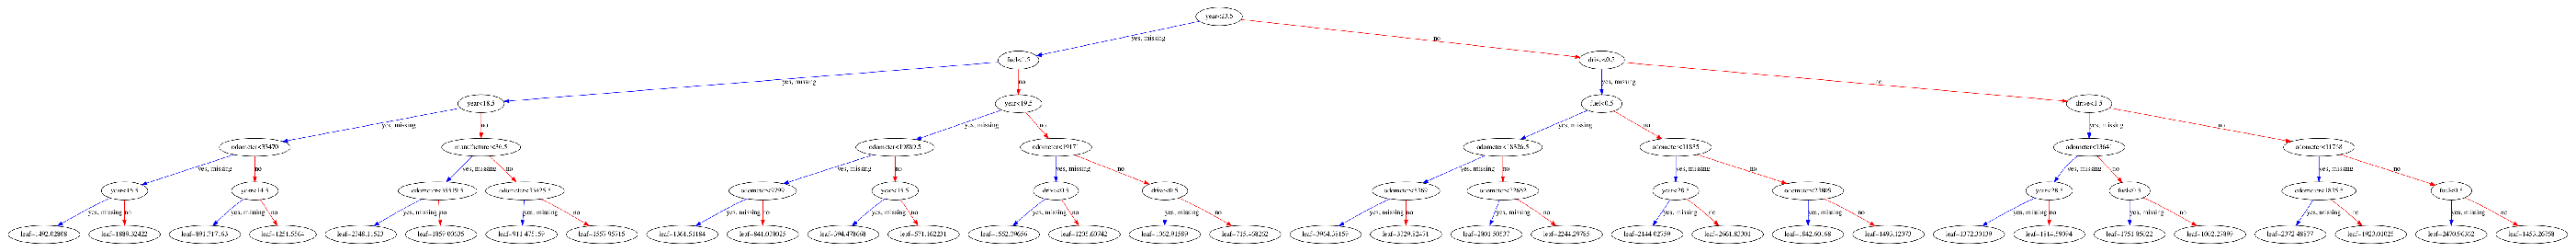

In [82]:
fig, ax = plt.subplots(figsize=(50, 50))
plot_tree(xgb_regression, ax=ax, num_trees=0) 
plt.show()

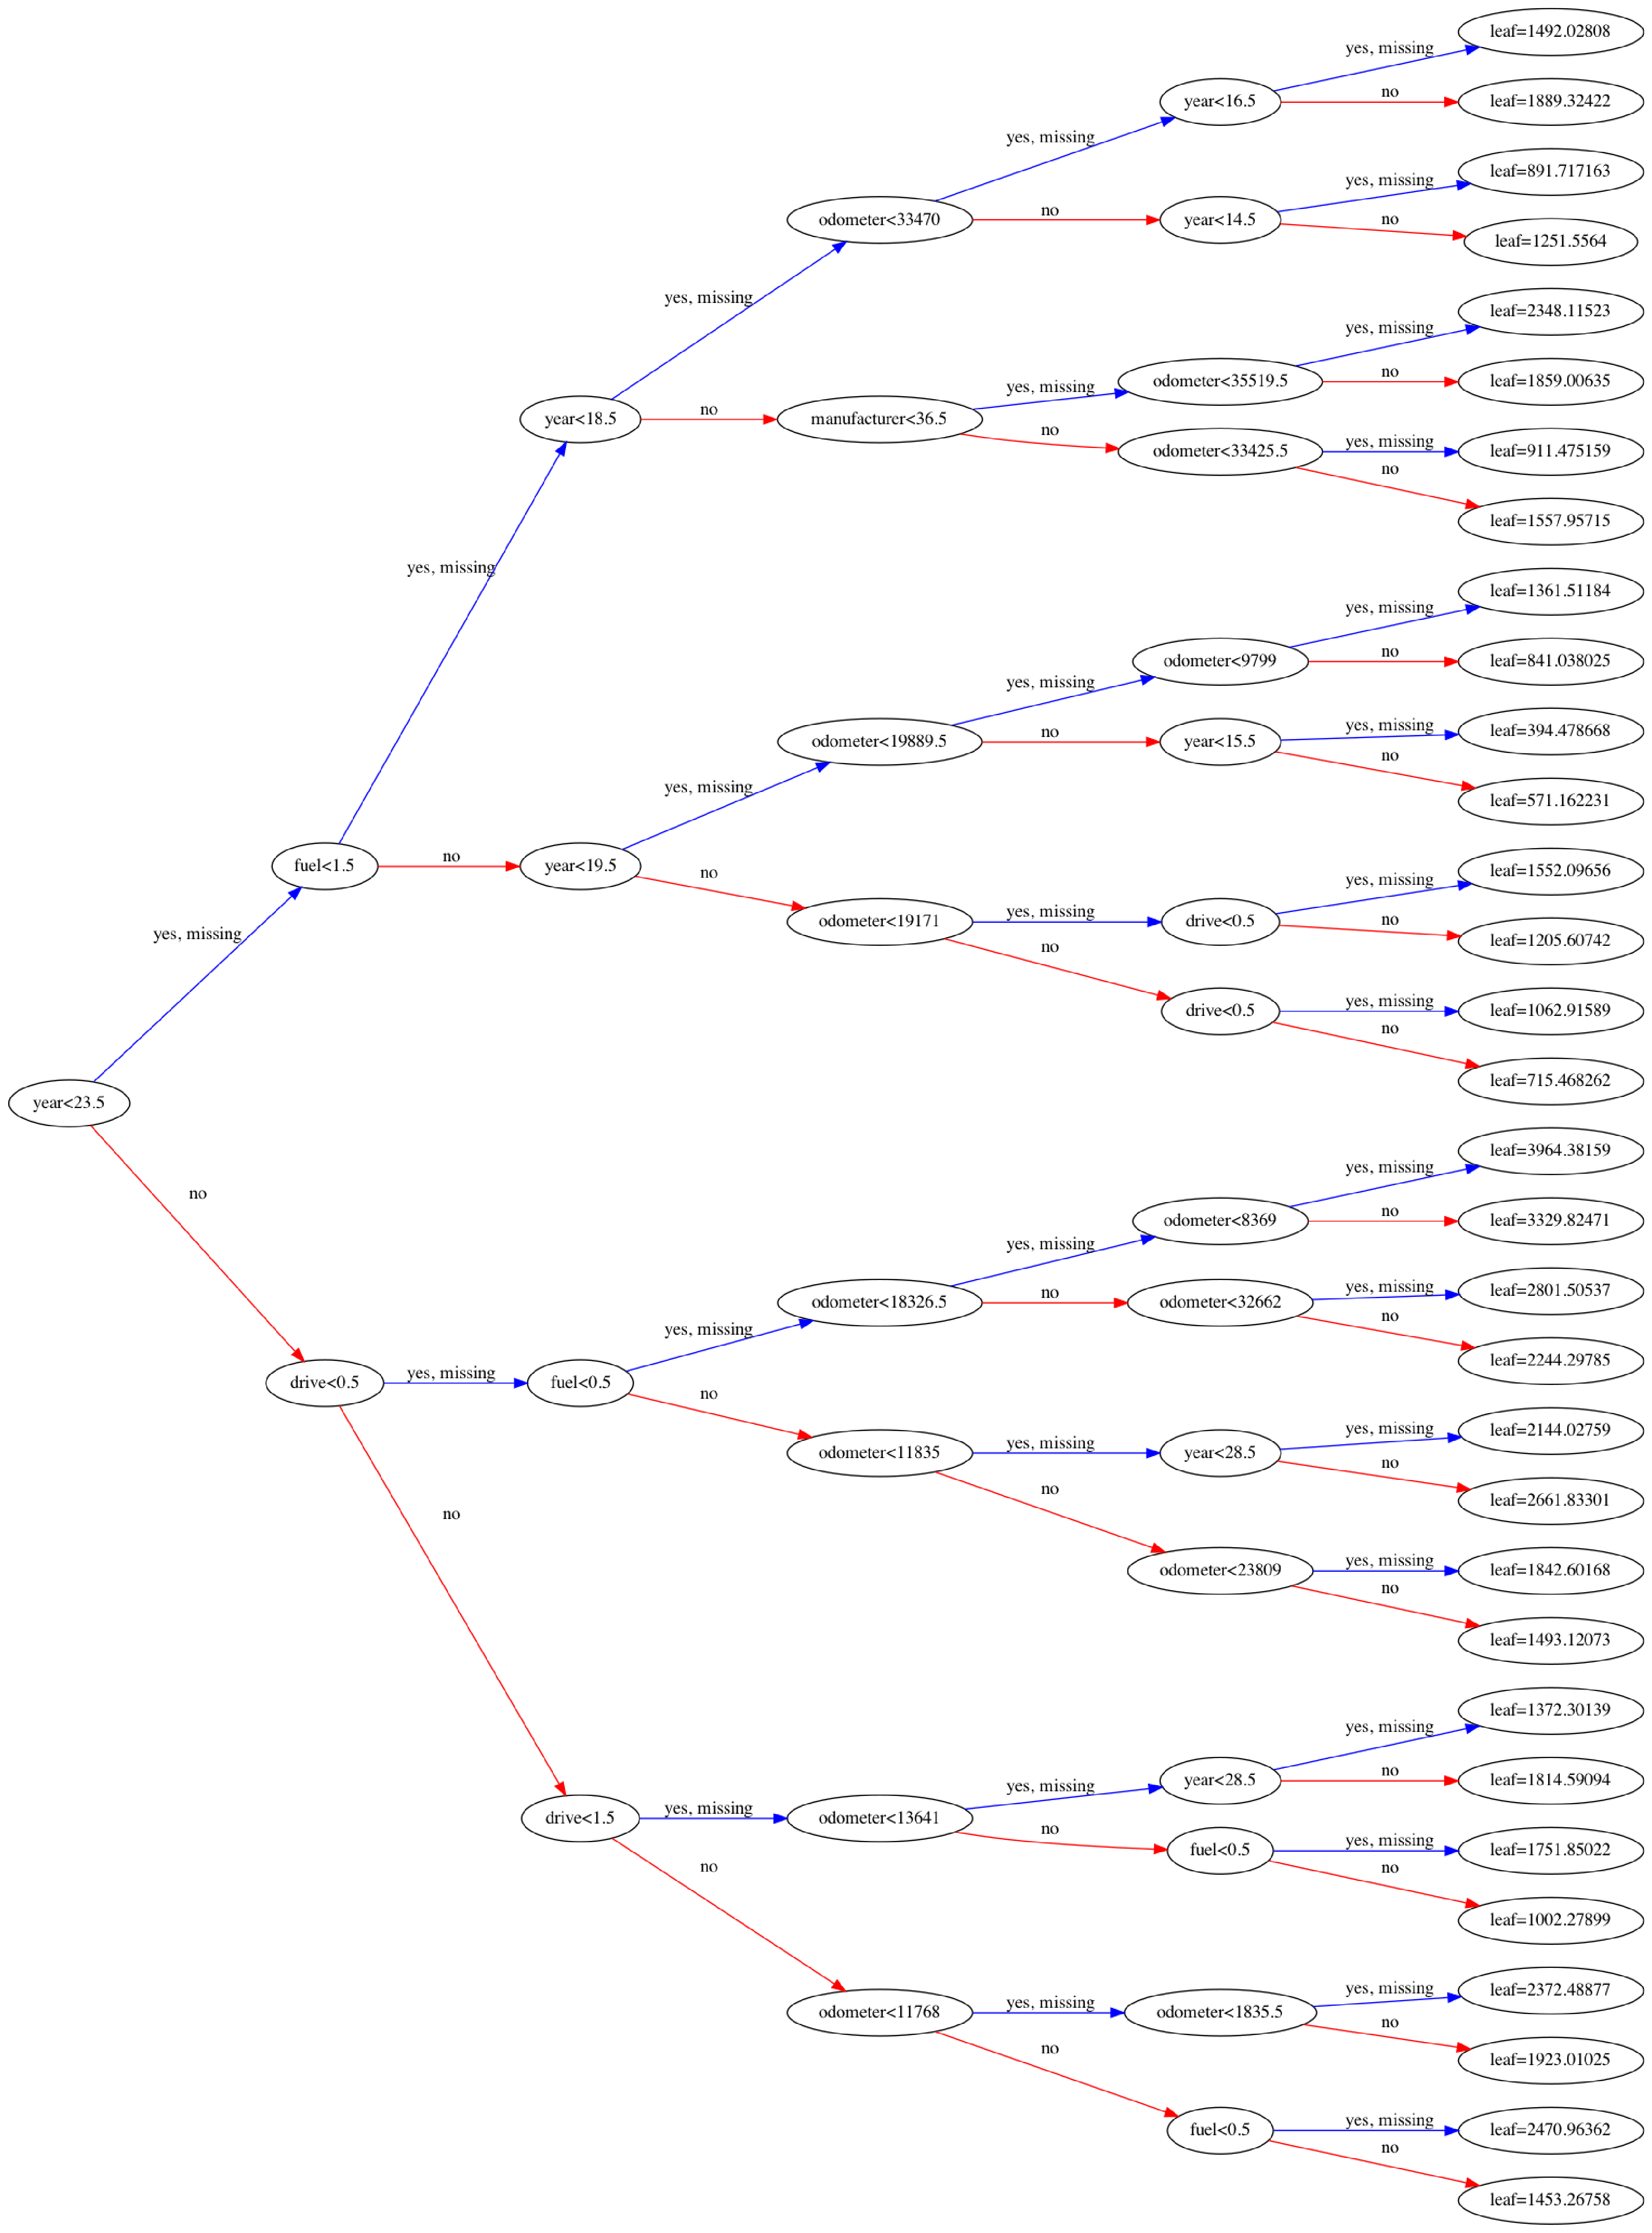

In [225]:
fig, ax = plt.subplots(figsize=(80, 80))
plot_tree(xgb_regression,rankdir='LR', ax=ax)
plt.savefig('XGBoos_tree_result.png')
plt.show()

In [227]:
from sklearn.metrics import explained_variance_score
xgb_variance = explained_variance_score(preds_for_XGBoost, y_test_for_XGBoost)
print('Variance score: ', round(xgb_variance, 4))

Variance score:  0.5122


In [85]:
data_dmatrix = xgb.DMatrix(data=X_train_for_XGBoost,label=y_train_for_XGBoost)

In [86]:
params = {"objective":"reg:linear",'colsample_bytree': 1,'learning_rate': 0.08,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)





In [87]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17397.649089,31.402356,17398.175130,62.887945
1,16228.124023,29.159472,16231.842122,58.572963
2,15165.310872,27.324064,15169.041016,56.163082
3,14202.644857,24.950793,14209.213867,54.778665
4,13330.810221,23.192451,13339.009440,51.353326


In [ ]:
# Output the notebook as HTML file
os.system('jupyter nbconvert --to html finalProjectNotebookV1.ipynb')